<a href="https://colab.research.google.com/github/n7darklight/notebook_SR/blob/main/Speech_Recognition_V1_DTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f_out = '/content/drive/MyDrive/Sound Data/Fixed/Cewe/Splitted'
m_out = '/content/drive/MyDrive/Sound Data/Fixed/Cowo/Splitted'
baru = '/content/drive/MyDrive/Sound Data/Fixed/Baru'
test_data = '/content/drive/MyDrive/Sound Data/test'

In [4]:
import os

label = os.listdir(f_out)
print(label)

['Qoola', 'Kaana', 'Walaa', 'Bimaa', 'Bihaa', 'Tsaani', 'Idzaa', 'Fii', 'Bii', 'Qiila', 'Sabiila', 'Qoliila', 'Jamiia', 'Fiihi', 'Yaquulu', 'Rasuulu', 'Wujuuhu', 'Yadzuuqu', 'Quluubu', 'Dzunuubi']


In [5]:
!pip install git+https://github.com/pierre-rouanet/dtw.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pierre-rouanet/dtw.git to /tmp/pip-req-build-jcxf7hxr
  Running command git clone -q https://github.com/pierre-rouanet/dtw.git /tmp/pip-req-build-jcxf7hxr
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=18210 sha256=1e244f59bc5613500707cd56077168a2e69538a1fb97b6a0248a97cedb5e085d
  Stored in directory: /tmp/pip-ephem-wheel-cache-774fx7b3/wheels/19/11/b6/fe1dda77acabebfd6a3bb268c2a0575eb9bec3930995a5bc9c
Successfully built dtw


In [6]:
file_count_per_class = len(os.listdir(os.path.join(f_out, label[0]))) + len(os.listdir(os.path.join(m_out, label[0])))
print(file_count_per_class)

10


In [7]:
import librosa
import IPython.display
from IPython.display import Image
import numpy as np

from dtw import dtw
from scipy.spatial.distance import cdist

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

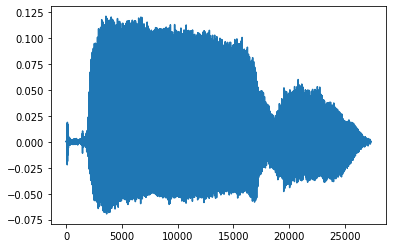

In [8]:
y, sr = librosa.load(os.path.join(os.path.join(f_out, label[0]), '1_Qoola.wav'))
plt.plot(y)
IPython.display.Audio(data=y, rate=sr)

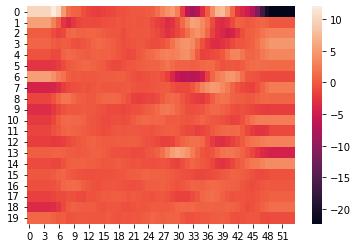

In [9]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc_delta = librosa.feature.delta(mfcc)
sns.heatmap(mfcc_delta)

In [10]:
mfcc.T.shape

(54, 20)

In [11]:
!pip install pynormalize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 218 kB 8.3 MB/s 


# Feature Extraction With MFCC and DTW

## Normalizing all audio files into -20 dbfs

In [ ]:
import pynormalize

target_dbfs = -20

for class_index, subfolder in enumerate(label):
  for audio in os.listdir(os.path.join(f_out, subfolder)):
    file = os.path.join(os.path.join(f_out, subfolder), audio)
    pynormalize.process_files([file], target_dbfs=target_dbfs, directory='NORMALIZED CE')

for class_index, subfolder in enumerate(label):
  for audio in os.listdir(os.path.join(m_out, subfolder)):
    file = os.path.join(os.path.join(m_out, subfolder), audio)
    pynormalize.process_files([file], target_dbfs=target_dbfs, directory='NORMALIZED CO')

(1 of 1) Processing file : "1_Qoola.wav"
(1 of 1) Processing file : "2_Qoola.wav"
(1 of 1) Processing file : "3_Qoola.wav"
(1 of 1) Processing file : "4_Qoola.wav"
(1 of 1) Processing file : "5_Qoola.wav"
(1 of 1) Processing file : "1_Kaana.wav"
(1 of 1) Processing file : "2_Kaana.wav"
(1 of 1) Processing file : "3_Kaana.wav"
(1 of 1) Processing file : "4_Kaana.wav"
(1 of 1) Processing file : "5_Kaana.wav"
(1 of 1) Processing file : "1_Walaa.wav"
(1 of 1) Processing file : "2_Walaa.wav"
(1 of 1) Processing file : "3_Walaa.wav"
(1 of 1) Processing file : "4_Walaa.wav"
(1 of 1) Processing file : "5_Walaa.wav"
(1 of 1) Processing file : "1_Bimaa.wav"
(1 of 1) Processing file : "2_Bimaa.wav"
(1 of 1) Processing file : "3_Bimaa.wav"
(1 of 1) Processing file : "4_Bimaa.wav"
(1 of 1) Processing file : "5_Bimaa.wav"
(1 of 1) Processing file : "1_Bihaa.wav"
(1 of 1) Processing file : "2_Bihaa.wav"
(1 of 1) Processing file : "3_Bihaa.wav"
(1 of 1) Processing file : "4_Bihaa.wav"
(1 of 1) Process

## Generate all audio file MFCC's

### With Normalization

In [ ]:
mfccs = []
labels = []
jk = ['/content/NORMALIZED CE', '/content/NORMALIZED CO']

for dex, l in enumerate(label):
  for folder in jk:
    for file in os.listdir(folder):
      if l+'.' in file:
        y1, sr1 = librosa.load(os.path.join(folder, file))
        mfcc1 = librosa.feature.mfcc(y1, sr1)
        labels.append(dex)
        mfccs.append(mfcc1.T)

mfccs = np.array(mfccs)
labels = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


### Without Normalization

#### Original Dataset

In [12]:
mfccs = []
labels = []
jk = [f_out, m_out]

for folder in jk:
  for ind, subfolder in enumerate(os.listdir(folder)):
    for file in os.listdir(os.path.join(folder,subfolder)):
      y1, sr1 = librosa.load(os.path.join(os.path.join(folder, subfolder), file))
      mfcc1 = librosa.feature.mfcc(y1, sr1)
      labels.append(ind)
      mfccs.append(mfcc1.T)

mfccs = np.array(mfccs)
labels = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


#### New Dataset

In [13]:
new_mfccs = []
new_labels = []

for dex, l in enumerate(label):
  for file in os.listdir(baru):
    if l+'.' in file:
      y1, sr1 = librosa.load(os.path.join(baru, file))
      mfcc1 = librosa.feature.mfcc(y1, sr1)
      new_labels.append(dex)
      new_mfccs.append(mfcc1.T)

new_mfccs = np.array(new_mfccs)
new_labels = np.array(new_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


#### Combined Dataset

In [14]:
all_mfccs = []
all_labels = []

for i, lab in enumerate(label):
  for j in range(10):
    if j<5:
      all_mfccs.append(mfccs[j+(i*5)])
      all_labels.append(labels[j+(i*5)])
    else:
      all_mfccs.append(mfccs[j+(i*5)+95])
      all_labels.append(labels[j+(i*5)+95])
  for k in range(40):
    all_mfccs.append(new_mfccs[k+(i*40)])
    all_labels.append(new_labels[k+(i*40)])

all_mfccs = np.array(all_mfccs)
all_labels = np.array(all_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


#### MFCC reference for each label

In [15]:
ref_mfccs = []
for i, lab in enumerate(label):
  ref_mfccs.append(mfccs[i*5])

ref_mfccs = np.array(ref_mfccs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


### Preview & Save

In [ ]:
mfccs.shape

(200,)

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17,
       17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19])

In [ ]:
labels.shape

(200,)

In [ ]:
new_mfccs.shape

(800,)

In [ ]:
new_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [ ]:
new_labels.shape

(800,)

In [ ]:
all_mfccs.shape

(1000,)

In [ ]:
all_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [ ]:
all_labels.shape

(1000,)

In [ ]:
ref_mfccs.shape

(20,)

In [ ]:
np.save('all_mfccs.npy', all_mfccs)

In [ ]:
np.save('all_labels.npy', all_labels)

In [ ]:
np.save('ref_mfcccs.npy', ref_mfccs)

## Load already created reference MFCC's of all 20 labels

In [ ]:
ref_mfccs = np.load('/content/ref_mfccs.npy', allow_pickle=True)

## Find the DTW's based on reference MFCC's

In [16]:
dtws = []
for i, x in enumerate(all_mfccs):
  temp = []
  for y in ref_mfccs:
    d, _, _, _ = dtw(x, y, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
    temp.append(d)
  dtws.append(temp)

In [17]:
dtws = np.array(dtws)

In [18]:
dtws.shape

(1000, 20)

In [19]:
dtws

array([[    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444],
       [38806.61968994, 39570.67648315, 39183.40039062, ...,
        47297.42749023, 48960.02304077, 48358.12393188],
       [35285.38360596, 35708.76055908, 34962.05731201, ...,
        42397.43002319, 41912.98696899, 42926.95529175],
       ...,
       [24634.78889465, 26225.6368866 , 24918.75863647, ...,
        31029.92146301, 29484.43640137, 26616.20843506],
       [25888.01014709, 27080.76922607, 26668.51547241, ...,
        31937.56918335, 30555.17346191, 27544.32015991],
       [25122.75352478, 26101.22511292, 25982.77212524, ...,
        30867.27331543, 29587.5246582 , 26216.02333069]])

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
norm_dtws = scaler.fit_transform(dtws)
norm_dtws

array([[0.        , 0.2851777 , 0.24728686, ..., 0.46146089, 0.41778346,
        0.46141286],
       [0.80238933, 0.85901717, 0.83054362, ..., 0.88877759, 0.88257074,
        0.90461229],
       [0.7295821 , 0.77518105, 0.74106671, ..., 0.79670054, 0.75553837,
        0.80301402],
       ...,
       [0.50936391, 0.56931734, 0.52818581, ..., 0.58309089, 0.53149691,
        0.49789668],
       [0.53527628, 0.58788092, 0.5652742 , ..., 0.60014672, 0.55079839,
        0.51525842],
       [0.51945337, 0.56661656, 0.55073897, ..., 0.58003453, 0.53335521,
        0.49041061]])

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
scaled_dtws = scaler.fit_transform(dtws)
scaled_dtws

array([[-5.4055695 , -2.97915462, -2.95868837, ..., -2.03286815,
        -1.97557251, -1.94867345],
       [ 1.76884787,  1.88011198,  1.7976399 , ...,  1.6718548 ,
         2.06192517,  1.82521999],
       [ 1.1178554 ,  1.17018857,  1.06797574, ...,  0.87357102,
         0.95842487,  0.96009916],
       ...,
       [-0.85118525, -0.57306312, -0.66802036, ..., -0.97836823,
        -0.98777055, -1.63800962],
       [-0.61949457, -0.41586693, -0.36557281, ..., -0.83049867,
        -0.82010309, -1.49017242],
       [-0.76097224, -0.59593333, -0.48410436, ..., -1.00486608,
        -0.97162789, -1.70175437]])

In [ ]:
np.save('DTWS.npy', dtws)

# Train Test Split
(Optional because having new seperate test data, but preferable for validating the training process)

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(norm_dtws,all_labels,test_size=0.2)

In [174]:
X_train.shape

(800, 20)

In [175]:
y_train.shape

(800,)

In [176]:
y_train

array([ 1, 12,  8, 18,  5,  7,  8,  5,  7,  9, 19,  3,  9,  2,  7,  2,  1,
        0,  3,  4, 19,  4,  4,  2, 13,  2,  3, 17, 16, 12,  8, 14,  3,  6,
       10,  4,  5,  1, 12, 19, 16,  3,  4,  9,  8,  6, 10, 18, 16, 19, 14,
       13,  1, 15,  6, 18,  9, 19, 16, 11, 18, 11,  0, 14,  8,  1,  0,  7,
        6,  3,  3,  7, 18,  3, 11,  6, 11,  1,  6, 13, 14,  4,  1, 16,  7,
       10,  4, 18,  8, 11, 15, 18,  5,  3,  0, 11, 15,  2,  6, 19, 10,  5,
       17, 18, 10, 19, 16, 14, 11,  8, 12, 11, 16,  1,  5, 14,  6,  3, 10,
       13,  9, 19,  7,  6,  7, 19,  3, 18,  4,  0, 18,  5, 19, 17, 15,  2,
       16, 17,  0, 14, 13,  4,  8,  4,  5, 16, 14,  4, 17,  7, 12,  5, 15,
        9,  0,  5,  8,  0, 18, 18,  7,  6, 10, 16,  9, 19,  9, 13,  5,  7,
        5,  2,  0, 12,  2,  9,  5, 17, 14,  4,  0, 13, 12,  3, 14, 17,  8,
        4, 12,  2, 11, 14, 14, 19, 14, 12,  7, 18, 18, 11,  7,  4, 15,  0,
        2, 15, 16, 16, 10,  6,  0,  5, 11,  6,  2,  5,  0,  8,  0, 15, 14,
        9,  7,  3, 19,  1

In [177]:
X_test.shape

(200, 20)

In [178]:
y_test.shape

(200,)

In [179]:
y_test

array([ 2,  9, 11,  3, 18,  1, 12,  4, 15,  2, 17, 19,  9, 12,  2, 14, 11,
        4, 17,  3,  3, 17,  1, 15, 17, 17, 18,  3,  8, 16,  7, 10, 19, 16,
        2,  5, 19, 16, 14,  1, 17,  1,  6,  7,  3, 15,  4, 13,  7,  7, 11,
       13,  1, 19,  7, 15, 19,  0,  5,  7, 16,  3, 15, 19,  3, 11, 12, 11,
        0,  5,  5,  9,  4,  7,  0,  1,  8,  7,  8, 13,  6, 14,  9, 17, 18,
       18,  6,  4,  4, 14, 11,  0,  9, 15,  2, 17, 18, 14, 17,  2,  7, 10,
       14, 19,  9,  6,  0,  3, 14,  9, 18, 12, 10, 16,  8,  0, 13, 12,  4,
        4,  7,  4,  5,  4,  8, 17, 17,  1,  0,  2, 13,  3,  9,  3, 13, 17,
        9, 14,  4,  6, 13, 17, 12,  2, 15,  0,  3, 12, 16, 19,  4,  7,  6,
        4, 10, 18, 11,  0,  6,  6,  1, 17,  9,  3,  1,  3, 12,  4, 16, 15,
        9,  6,  5, 19,  2, 11, 19, 18, 12,  1, 18,  9, 19, 17,  8,  8, 18,
       13, 17, 11, 14,  5,  7, 10, 11, 18, 15, 11,  6,  6])

# Using KNN Classifier
Best for numerical data that have distance based correlation

In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
k_range = range(1, 100)
param_grid = dict(n_neighbors=k_range)

In [182]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
search = GridSearchCV(knn, param_grid, n_jobs=-1)

In [183]:
result = search.fit(X_train, y_train)

In [184]:
result.best_params_

{'n_neighbors': 1}

## Train Eval

In [185]:
score = result.best_estimator_.score(X_test, y_test)
print(score)

0.63


In [186]:
pre = result.best_estimator_.predict([norm_dtws[78]])
print(label[int(pre)])

Kaana


In [187]:
print(label[all_labels[78]])

Kaana


## Save the model

In [ ]:
import joblib

filename = 'finalized_model.pkl'
joblib.dump(result.best_estimator_, filename)

['finalized_model.pkl']

# Using DT
(Optional Classification Algorithm to Use)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_test, y_test)

0.4

In [ ]:
from sklearn import tree

text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_8 <= 32511.69
|   |--- feature_13 <= 40363.04
|   |   |--- feature_7 <= 22010.63
|   |   |   |--- feature_4 <= 27198.96
|   |   |   |   |--- feature_0 <= 26191.33
|   |   |   |   |   |--- feature_8 <= 26097.62
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_8 >  26097.62
|   |   |   |   |   |   |--- feature_15 <= 32113.31
|   |   |   |   |   |   |   |--- feature_8 <= 31388.36
|   |   |   |   |   |   |   |   |--- feature_10 <= 13764.65
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 21473.70
|   |   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |   |   |--- feature_14 >  21473.70
|   |   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |   |--- feature_10 >  13764.65
|   |   |   |   |   |   |   |   |   |--- feature_19 <= 29927.53
|   |   |   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |   |   |--- feature_19 >  29927.53
|   |   |   |   |   |   |   |   |   |   |--- fe

# Try Inference Process

In [ ]:
y, sr = librosa.load('/content/WhatsApp Audio 2021-10-24 at 05.48.42.mp4')
mfcc = librosa.feature.mfcc(y, sr)

distance = np.ones((1, len(ref_mfccs)))
for i, m in enumerate(ref_mfccs):
  dist, _, _, _ = dtw(mfcc.T, m, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
  distance[0,i] = dist
print(distance)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[3039678.54110718 3057077.17445374 3023657.909729   2741626.15049744
  2761430.13693237 2654616.60328674 2800055.79025269 2697159.85137939
  2814773.56089783 2747800.74291992 2667180.29452515 2832121.48321533
  2874660.91542053 2704730.3397522  2791566.66305542 2584291.67098999
  2813502.16854858 2581804.85954285 2842036.14349365 2727106.94801331]]


In [ ]:
import joblib

loaded_model = joblib.load('finalized_model.pkl')
pre = loaded_model.predict(distance)[0]
print(label[int(pre)])

Rasuulu


# Evaluation Using Test Data

## Normalize (optional)

In [ ]:
for test_audio in os.listdir(test_data):
  file = os.path.join(test_data, test_audio)
  pynormalize.process_files([file], target_dbfs=target_dbfs, directory='NORMALIZED TEST')

(1 of 1) Processing file : "1_Qoola.wav"
(1 of 1) Processing file : "1_Kaana.wav"
(1 of 1) Processing file : "1_Walaa.wav"
(1 of 1) Processing file : "2_Qoola.wav"
(1 of 1) Processing file : "3_Qoola.wav"
(1 of 1) Processing file : "3_Kaana.wav"
(1 of 1) Processing file : "2_Kaana.wav"
(1 of 1) Processing file : "2_Bimaa.wav"
(1 of 1) Processing file : "1_Bimaa.wav"
(1 of 1) Processing file : "2_Walaa.wav"
(1 of 1) Processing file : "3_Walaa.wav"
(1 of 1) Processing file : "3_Bimaa.wav"
(1 of 1) Processing file : "1_Bihaa.wav"
(1 of 1) Processing file : "3_Bihaa.wav"
(1 of 1) Processing file : "2_Bihaa.wav"
(1 of 1) Processing file : "1_Tsaani.wav"
(1 of 1) Processing file : "2_Tsaani.wav"
(1 of 1) Processing file : "2_Idzaa.wav"
(1 of 1) Processing file : "3_Tsaani.wav"
(1 of 1) Processing file : "1_Idzaa.wav"
(1 of 1) Processing file : "3_Idzaa.wav"
(1 of 1) Processing file : "1_Fii.wav"
(1 of 1) Processing file : "2_Fii.wav"
(1 of 1) Processing file : "1_Bii.wav"
(1 of 1) Processing

## Load Test Data, Get The MFCC Feature of It and Calculate The DTW's 

In [145]:
test_dtws = []
test_labels = []
for test_audio in os.listdir(test_data):
  for i, l in enumerate(label):
    if l+'.wav' in test_audio:
      test_labels.append(i)

  y2, sr2 = librosa.load(os.path.join(test_data, test_audio))
  mfcc2 = librosa.feature.mfcc(y2, sr2)

  distance = np.ones((1, len(ref_mfccs)))
  for i, m in enumerate(ref_mfccs):
    dist, _, _, _ = dtw(mfcc.T, m, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
    distance[0,i] = dist
  test_dtws.append(distance[0])
test_dtws = np.float64(test_dtws)

In [146]:
test_dtws

array([[    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444],
       [    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444],
       [    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444],
       ...,
       [    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444],
       [    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444],
       [    0.        , 13136.72756195, 11666.50363159, ...,
        24557.22701263, 23176.25865173, 24665.88248444]])

In [149]:
test_dtws = np.array(test_dtws)
test_labels = np.array(test_labels)

print(test_dtws.shape)
print(test_labels.shape)

(60, 20)
(60,)


## Calculate Recall of Prediction Result on Test Data

In [188]:
y_predict = result.best_estimator_.predict(X_test)
for iy, y in enumerate(y_test):
  print('True Label: '+label[y]+' Predicted Label: '+label[y_predict[iy]])
  if label[y]==label[y_predict[iy]]:
    print('Status: True')
    TP+=1
  elif label[y]!=label[y_predict[iy]]:
    print('Status: False')
    FN+=1

True Label: Walaa Predicted Label: Walaa
Status: True
True Label: Qiila Predicted Label: Sabiila
Status: False
True Label: Qoliila Predicted Label: Sabiila
Status: False
True Label: Bimaa Predicted Label: Bimaa
Status: True
True Label: Quluubu Predicted Label: Rasuulu
Status: False
True Label: Kaana Predicted Label: Kaana
Status: True
True Label: Jamiia Predicted Label: Jamiia
Status: True
True Label: Bihaa Predicted Label: Bihaa
Status: True
True Label: Rasuulu Predicted Label: Rasuulu
Status: True
True Label: Walaa Predicted Label: Walaa
Status: True
True Label: Yadzuuqu Predicted Label: Rasuulu
Status: False
True Label: Dzunuubi Predicted Label: Quluubu
Status: False
True Label: Qiila Predicted Label: Bii
Status: False
True Label: Jamiia Predicted Label: Jamiia
Status: True
True Label: Walaa Predicted Label: Walaa
Status: True
True Label: Yaquulu Predicted Label: Yaquulu
Status: True
True Label: Qoliila Predicted Label: Qoliila
Status: True
True Label: Bihaa Predicted Label: Qiila
S

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=label))

              precision    recall  f1-score   support

       Qoola       0.86      0.67      0.75         9
       Kaana       0.62      0.80      0.70        10
       Walaa       0.80      0.89      0.84         9
       Bimaa       0.75      0.69      0.72        13
       Bihaa       0.60      0.43      0.50        14
      Tsaani       0.67      0.57      0.62         7
       Idzaa       0.50      0.55      0.52        11
         Fii       0.67      0.33      0.44        12
         Bii       0.56      0.71      0.63         7
       Qiila       0.57      0.33      0.42        12
     Sabiila       0.38      0.60      0.46         5
     Qoliila       0.64      0.64      0.64        11
      Jamiia       0.88      0.78      0.82         9
       Fiihi       0.70      0.88      0.78         8
     Yaquulu       0.90      1.00      0.95         9
     Rasuulu       0.50      0.56      0.53         9
     Wujuuhu       0.38      0.71      0.50         7
    Yadzuuqu       0.56    